# #1
A neural network is a system that is like the human brain which processes data. When building a neural network, you need to choose an activation function that may best fit what you're trying to predict. You then train the data, and then test the data on the activation function. From there, you can create the neural network and run the neural network on the predicted data. You can also check the accuracy and fix the data to improve the accuracy as needed.

# #2
You can check the performance of a neural network by checking the accuracy of the model. You can use a Confusion Matrix to help figure out the accuracy and the classification report.

# #3

In [197]:
import pandas as pd
import torch

adult_df = pd.read_csv("adult.data")
adult_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [198]:
adult_df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [199]:
adult_df.rename(columns = {"39" : "Age", " State-gov" : "Workclass", " 77516" : "Fnlweight", " Bachelors" : "Education",
                           " 13" : "Education_num", " Never-married" : "Marital-status", " Adm-clerical" : "Occupation",
                           " Not-in-family" : "Relationship", " White" : "Race", " Male" : "Sex", " 2174": "Capital_gain", 
                           " 0" : "Capital_loss", " 40" : "Hours_per_week", " United-States" : "Native_country",
                           " <=50K" : "Income"}, inplace = True)
adult_df.head(10)

,Age,Workclass,Fnlweight,Education,Education_num,Marital-status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [200]:
adult_df.dtypes

Age                int64
Workclass         object
Fnlweight          int64
Education         object
Education_num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [201]:
adult_df

,Age,Workclass,Fnlweight,Education,Education_num,Marital-status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [202]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

adult_df["Workclass"] = class_labels.fit_transform(adult_df["Workclass"].values)
adult_df["Education"] = class_labels.fit_transform(adult_df["Education"].values)
adult_df["Marital-status"] = class_labels.fit_transform(adult_df["Marital-status"].values)
adult_df["Occupation"] = class_labels.fit_transform(adult_df["Occupation"].values)
adult_df["Relationship"] = class_labels.fit_transform(adult_df["Relationship"].values)
adult_df["Race"] = class_labels.fit_transform(adult_df["Race"].values)
adult_df["Sex"] = class_labels.fit_transform(adult_df["Sex"].values)
adult_df["Native_country"] = class_labels.fit_transform(adult_df["Native_country"].values)
adult_df["Income"] = class_labels.fit_transform(adult_df["Income"].values)

adult_df.head(10)

,Age,Workclass,Fnlweight,Education,Education_num,Marital-status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


# #4

In [203]:
from sklearn.model_selection import train_test_split

X = adult_df.drop("Income", axis = 1).values
y = adult_df["Income"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [204]:
import torch.nn as nn
import torch.nn.functional as F

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train)

tensor([[4.3000e+01, 7.0000e+00, 3.0850e+05,  ..., 0.0000e+00, 4.0000e+01,
         3.9000e+01],
        [1.9000e+01, 4.0000e+00, 5.4409e+05,  ..., 0.0000e+00, 2.5000e+01,
         3.9000e+01],
        [5.0000e+01, 4.0000e+00, 1.1856e+05,  ..., 0.0000e+00, 4.0000e+01,
         3.9000e+01],
        ...,
        [1.9000e+01, 4.0000e+00, 2.7997e+05,  ..., 0.0000e+00, 4.2000e+01,
         3.9000e+01],
        [2.7000e+01, 4.0000e+00, 2.1103e+05,  ..., 0.0000e+00, 4.0000e+01,
         2.6000e+01],
        [4.3000e+01, 2.0000e+00, 1.1702e+05,  ..., 0.0000e+00, 4.0000e+01,
         3.9000e+01]])


In [210]:
class ANN_Model(nn.Module):
    def __init__(self, input_features = 14, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__() 

        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [211]:
torch.manual_seed(42)
ann = ANN_Model()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [212]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f"Epoch number: {epoch} with loss {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 with loss 2188.669189453125
Epoch number: 11 with loss 151.61573791503906
Epoch number: 21 with loss 8.420278549194336
Epoch number: 31 with loss 0.7498700618743896
Epoch number: 41 with loss 0.6960087418556213
Epoch number: 51 with loss 0.654111921787262
Epoch number: 61 with loss 0.6228570938110352
Epoch number: 71 with loss 0.5989024639129639
Epoch number: 81 with loss 0.5811399221420288
Epoch number: 91 with loss 0.5682523250579834
Epoch number: 101 with loss 0.5591534376144409
Epoch number: 111 with loss 0.5526861548423767
Epoch number: 121 with loss 0.5481637120246887
Epoch number: 131 with loss 0.54496169090271
Epoch number: 141 with loss 0.5426133275032043
Epoch number: 151 with loss 0.5408540368080139
Epoch number: 161 with loss 0.5394429564476013
Epoch number: 171 with loss 0.5383920669555664
Epoch number: 181 with loss 0.5375041365623474
Epoch number: 191 with loss 0.5367135405540466
Epoch number: 201 with loss 0.5359429717063904
Epoch number: 211 with loss 0

In [213]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (9770).

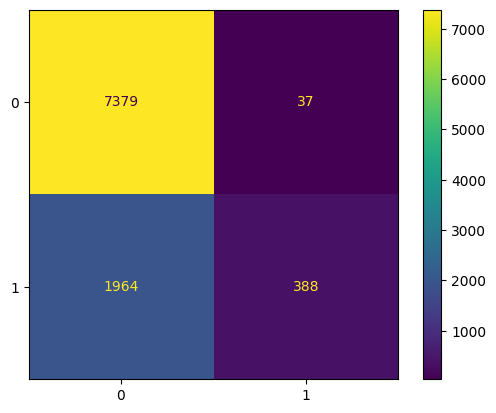

In [214]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7416
           1       0.91      0.16      0.28      2352

    accuracy                           0.80      9768
   macro avg       0.85      0.58      0.58      9768
weighted avg       0.82      0.80      0.74      9768



# #5

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = adult_df.drop("Income", axis = 1)
y = adult_df["Income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [217]:
regression = LogisticRegression(random_state = 42).fit(X_train, y_train)
y_pred = regression.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

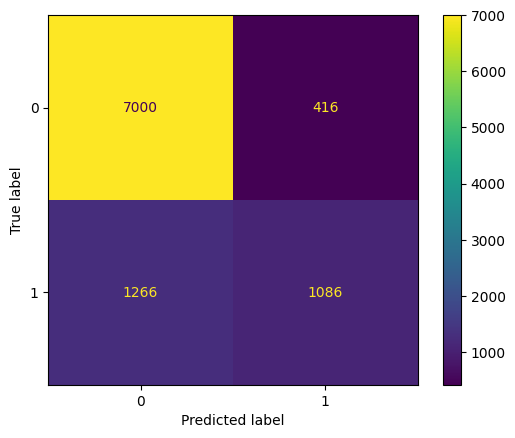

In [218]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7416
           1       0.72      0.46      0.56      2352

    accuracy                           0.83      9768
   macro avg       0.78      0.70      0.73      9768
weighted avg       0.82      0.83      0.81      9768



Overall, the logistic regression seems to do better than the neural network. The logistic regression has much better recall and slightly better accuracy. However, the neural network has much better precision. I think the logistic regression did better than the neural network because it can correctly predict more of the negatives than a neural network. The neural network is better at correctly deciding the positives.